In [197]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

sns.set(context='paper', style='ticks',
        font_scale=1, palette='colorblind')

## 1. Plotting the data

Let's start by generating the data. We will generate a random 8x20 binary matrix, where the probability of each element being 1 is 0.5:

In [198]:
# generate a random binary 8 by 20 matrix using binomial distribution
data = np.random.binomial(1, 0.2, (8, 20))

To visualize nestendess, we need to sort our matrix, so that the elements that are 1 are grouped together. We will sort both rows and columns by the number of 1s in each row and column, respectively.

In [218]:
def sort_matrix(M):

    # sort the matrix by the sum of each column (reverse order)
    M = M[:, np.argsort(M.sum(axis=0))[::-1]]
    # sort the matrix by the sum of each row
    M = M[np.argsort(M.sum(axis=1))[::-1]]

    return M

In [219]:
data_sorted = sort_matrix(data)

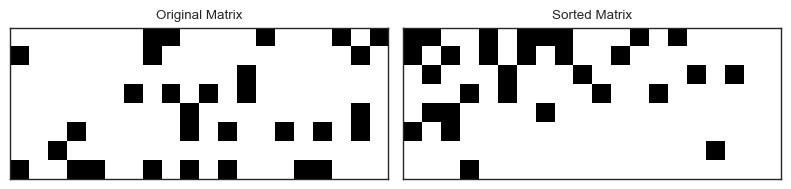

In [220]:
# plot original and sorted matrix with matplotlib

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(data, cmap='Greys', interpolation='nearest')
ax[0].set_title('Original Matrix')
# remove ticks
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(data_sorted, cmap='Greys', interpolation='nearest')
ax[1].set_title('Sorted Matrix')
# remove ticks
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.tight_layout()
plt.show()

## 2. Generating the fully nested matrix


Another thing that interest us is the fully nested matrix given the same parameters. We will generate it by countin the number of items in each row, and then generating a new matrix, where eac row is filled from the start to n, where n is the number of 1s in the row.

In [221]:
def fully_nested_matrix(M):

    # count number of 1s in the rows
    row_counts = M.sum(axis=1)

    # generate fully nested matrix

    nested_matrix = np.zeros((M.shape[0], M.shape[1]))

    for i, j in enumerate(row_counts):
        nested_matrix[i, :j] = 1

    return nested_matrix

In [222]:
nested_matrix = fully_nested_matrix(data_sorted)

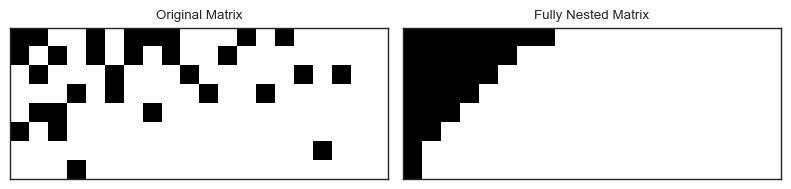

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].imshow(data_sorted, cmap='Greys', interpolation='nearest')
ax[0].set_title('Original Matrix')

ax[1].imshow(nested_matrix, cmap='Greys', interpolation='nearest')
ax[1].set_title('Fully Nested Matrix')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.show()

In [224]:
data.shape

(8, 20)

## 3. NODF

In [241]:
def NODF(M):
    '''
    Nestdness metric from (Almeida-Neto et al. 2008)
    '''
    m, n = M.shape
    
    # Calculate marginal totals for rows and columns
    MT_rows = np.sum(M, axis=1)
    MT_cols = np.sum(M, axis=0)
    
    # Initialize N_paired for rows and columns
    N_paired_rows = 0
    N_paired_cols = 0
    
    # Calculate N_paired for rows
    for i in range(m):
        for j in range(i + 1, m):
            if MT_rows[j] < MT_rows[i]:
                PO = np.sum(M[j] * M[i]) / MT_rows[j] if MT_rows[j] != 0 else 0
                N_paired_rows += PO
            else:
                N_paired_rows += 0
    
    # Calculate N_paired for columns
    for k in range(n):
        for l in range(k + 1, n):
            if MT_cols[l] < MT_cols[k]:
                PO = np.sum(M[:, l] * M[:, k]) / MT_cols[l] if MT_cols[l] != 0 else 0
                N_paired_cols += PO
            else:
                N_paired_cols += 0
    
    # Calculate the total number of pairs for rows and columns
    total_pairs_rows = m * (m - 1) / 2
    total_pairs_cols = n * (n - 1) / 2
    
    # Calculate NODF
    NODF_value = (N_paired_rows + N_paired_cols) / (total_pairs_rows + total_pairs_cols)
    
    return NODF_value

In [246]:
matrix = np.array([
    [1, 0, 1, 1, 1],  # r1
    [1, 1, 1, 0, 0],  # r2
    [0, 1, 1, 1, 0],  # r3
    [1, 1, 0, 0, 0],  # r4
    [1, 1, 0, 0, 0]   # r5
])

NODF(fully_nested_matrix(matrix))

np.float64(0.65)

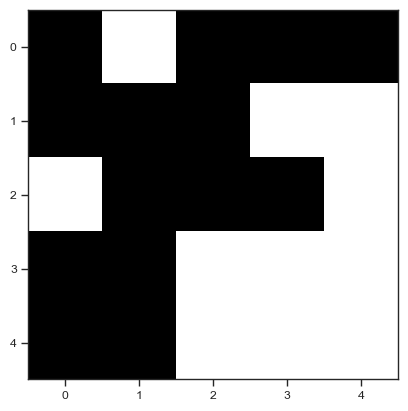

In [247]:
plt.imshow(matrix, cmap='Greys', interpolation='nearest')

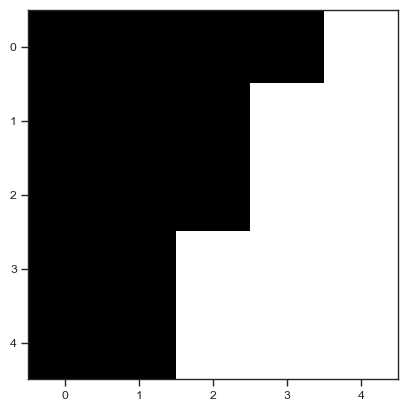

In [248]:
plt.imshow(fully_nested_matrix(matrix), cmap='Greys', interpolation='nearest')

In [249]:
NODF(data_sorted)

np.float64(0.18784403669724772)